# Introduction to Python for Geospatial Professionals

If you already know about GIS, and you want to learn some basics of Python, you're in the right spot. In this workshop, we will get hands-on practice with

* The fundamental patterns commonly used in Python
* Useful Python modules for working with geospatial data

Throughout this workshop, you will execute code in the notebook cells. You can do that by clicking the Run button at the top of the interface, or the keyboard shortcuts (ctrl+enter or shift+enter). Some of the code is written for you already, and some of it you will write yourself. Either way, you will get the most out of the workshop if you engage interactively with the code, rather than passively running it:

* Ask questions about what you see in the code
* Before running a code cell, make a prediction about what will happen
* Change the code and see what happens

## Lesson 1: Perform numeric calculations

A major reason to use Python is to manipulate data. Often that involves performing calculations on data - for example using the Calculate Field tool in ArcGIS. One way to think about Python is that it is a very fancy calculator.

### 1.1: Perform arithmetic with operators

We can use Python to determine values from inputs by using operators: addition (`+`), subtraction (`-`), multiplication (`*`), division (`/`) and exponentiation (`**`).

Run each of the cells below to see the arithmetic operators.

In [12]:
1 + 2

3

In [13]:
1 - 2

-1

In [14]:
1 * 2

2

In [15]:
1 / 2

0.5

In [16]:
1 ** 2

1

Python operators follow a typical order of operations where exponentiation is evaluated first from left to right, then multiplication and division from left to right, then addition and subtraction from left to right. 

Run the cell below to see order of operations in action

In [17]:
1 / 4 * 2

0.5

If the default order of operations will produce the wrong response, we can use parantheses to force the correct order. Any operation inside parentheses will be evaluated before any other operation. 

Run the cell below to see how parentheses can force a particular order of operations.

In [18]:
1 / (4 * 2)

0.125

#### Checkpoint 1.1: Operators

US federal law defines a foot as exactly 0.3048 meters. In the cell below, use this definition to determine the number of meters in 50 feet.

In [19]:
50 * 0.3048

15.24

A temperature sensor reported readings of 30.1°C, 32.0°C, and 31.8°C. In the cell below, calculate the average temperature reading.

In [20]:
(30.1 + 32 + 31.8) / 3

31.3

### 1.2: Refer to complex values with variables

Instead of using values directly, it can be helpful to give those values names and refer to them by name. This name is called a variable. We can assign values to variables with the assignment operator (`=`). If we write `variable = value`, we are saying "this variable refers to this value".



Run the cell below to assign coordinate values to variables. Unlike the code above, simply assigning variable values will not output anything to the notebook.

In [21]:
x1 = 86946.415578
y1 = 2719456.806167

x2 = 86803.207582
y2 = 2719506.303920

Using variables gives us two advantages:

* We only need to define their value once and then we can reuse them. If we need to change our definition, we only need to make one update and that update is automatically reflected everywhere the variable is used. That makes code easier to write.
* Well-named variables provide context for the value. `2719456.806167` is just a number. Assigning that number to a variable called `y1` helps us understand what the value means. That makes code easier to read.

Because good variable names can make a big difference in the readability of your code, take care to come up with effective names.

We can perform the same types of operations on variables as we can on the values the variables represent.

Run the cell below to use the [2-dimensional Euclidean distance formula](https://en.wikipedia.org/wiki/Euclidean_distance#Two_dimensions) to calculate the distance between (`x1`, `y1`) and (`x2`, `y2`) and assign that value to a variable named `distance`.

In [22]:
distance = (((x1 - x2) ** 2) + ((y1 - y2) ** 2)) ** 0.5

A very common pattern is to reuse a calculated value in additional calculations to make those calculations easier to understand. For example, if we wanted twice the distance between (`x1`, `y1`) and (`x2`, `y2`), we could have calculated that all on a single line. But it is easier to follow what is happening if we calculate the distance, then calculate twice the distance.

Run the cell below to see this use of variables.

In [23]:
distance * 2

303.0416319278463

#### Checkpoint 1.2: Variables

In the cell below, write code to calculate half the distance between (`x1`, `y1`) and (`x2`, `y2`).

In [24]:
distance / 2

75.76040798196158

In the cell below, define new values for `x1` and `y1`. Then, without writing any additional code, calculate half the distance from that new point to (`x2`, `y2`). Hint: in a notebook, cells can be run in any order.

In [25]:
x1 = 7
y1 = 20

# then rerun the cells above that define the distance variable and calculate distance/2

### Application 1: Calculate population density

Consider a county with a population of 2,487,401 and an area of 2,107 mi<sup>2</sup>. In the cell below, create two variables, called `pop` and `sq_mi` and assign them the appropriate value.

In [26]:
pop = 2487401
sq_mi = 2107

In the cell below, use the `pop` and `sq_mi` variables to calculate the population density of the county in people per square mile.

In [27]:
pop_per_sq_mi = pop / sq_mi

There are 2.589988 square kilometers in a square mile. In the cell below, recalculate the population density of the county in people per square kilometer.

In [28]:
pop_per_sq_km = pop / (sq_mi / 2.589988)

In the cell below, calculate the population density in people per square mile if the county experiences 12% population growth.

In [29]:
new_pop_per_sq_mi = pop_per_sq_mi * 1.12

## Lesson 2: Simplify complexity with abstraction

Computers are complicated. Too complicated for people to fully understand. Instead, we rely on an abstract representation of the system. We say things like "these circuits are logic gates."

Even that abstraction is pretty complicated. So we represent it as an even higher-order abstraction, like "these logic gates calculate values." Computer systems are layers on layers of abstraction until we get to "click Run, get result."

Abstraction is incredibly useful, because it allows us to manipulate something complex without having to deal with that complexity directly. Even if we did know exactly what happens when we click Run, abstraction means that we don't need to think about it every time we click.

### 2.1: Perform complex actions with functions

We saw in the previous lesson how variables could make it easier to understand complexity. Variables are one type of abstraction in Python. Functions are another.

Functions define some action for Python to perform. Instead of writing code for the action every time we want to use it, we can just use the name of the function followed by a pair of parentheses. Usually, we need to supply some information to the function. These pieces of information are called arguments, and we write them inside the parentheses.

Run the cell below to use the `print` function to write some text to the notebook's output. The quotation marks show that the value should be interpreted as text and not Python commands. This type of value is called a string.

In [30]:
tobler = 'Everything is related to everything else, but near things are more related than distant things.'
print(tobler)

Everything is related to everything else, but near things are more related than distant things.


The code required to get the notebook to show the text of the `tobler` string is fairly complex. But we don't need to worry about exactly how the `print` function works. We just need to be able to use it.

Some functions, like `print`, can stand alone. Other functions are always attached to some value. These types of functions are called methods.

Run the cell below to replace all the spaces in the `tobler` string with underscores.

In [31]:
tobler.replace(' ', '_')

'Everything_is_related_to_everything_else,_but_near_things_are_more_related_than_distant_things.'

Let's break down this code:

1. The dot between `tobler` and `replace` shows that the `replace` method will operate on the `tobler` string. That's allowed because somebody wrote code for a `replace` method that all string values have.
1. We put parentheses after the method name, just like with other functions.
1. The `replace` method needs two arguments. The first is the part of the string that will be replaced. The second is what will replace it.
1. When we supply multiple arguments, they are separated by a comma.
1. Because this value is created by the last line in the cell, the notebook writes the output for us to see.

Strings have many different methods we can use. [This reference from W3 Schools](https://www.w3schools.com/python/python_ref_string.asp) describes each of them. 

#### Checkpoint 2.1: Functions

The `help` function can provide information about a Python object. In the cell below, pass the `print` function as an argument to the `help` function to find out more about what we can do with `print` function.

In [32]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



String values have a method called `endswith`. The method takes one string argument and returns `True` if the string ends with that argument. In the cell below, use the `endswith` method with the argument `'things'` on the `tobler` string.

In [33]:
tobler.endswith('things')

False

### 2.2: Use abstractions imported from modules.

Many functions and methods, like `print`, are built in to Python. But even more are available in separate blocks of code called modules. We can import these modules into our scripts to use their functionality. Using modules effectively is a key Python pattern. Instead of creating new solutions from scratch, it makes more sense to use existing code to solve a problem.

Run the cell below to import the `time` module. This module has many abstractions for making it easier to work with time.

In [34]:
import time

Now that the module has been imported into our script, we can use it. Run the cell below to output a text representation of the current local date and time.

In [35]:
time.ctime()

'Sun Apr 23 09:52:55 2023'

Let's breakdown this code:
1. We invoke the `time` module. That's allowed because we previously imported the module.
1. We use `.` after `time` to indicate that what comes next is defined inside the `time` module.
1. We call the `ctime` function. That's allowed because the `time` module defines a function called `ctime`.
1. We do not supply any argument to the function, so it returns its default value of the current local date and time.
1. Because this value is created by the last line in the cell, the notebook writes the output for us to see.

#### Checkpoint 2.2: Modules 

The `time` module contains another function called `localtime` that provides the time in a structured format more easily readable by computers. In the cell below, run the `localtime` function. 

In [36]:
time.localtime()

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=23, tm_hour=9, tm_min=52, tm_sec=55, tm_wday=6, tm_yday=113, tm_isdst=1)

The `math` module contains a function called `sqrt` that takes a single number as an argument and returns the square root of that number. In the cell below, use the `math` module to find the square root of any number.

In [37]:
import math
math.sqrt(16)

4.0

### Application 2: Buffer road features with Shapely


Consider a scenario where we have some street centerlines for a neighborhood and we need to find a 20 meter buffer around those centerlines as part of a environmental impact analysis.

For this scenario, we will use [Shapely](https://shapely.readthedocs.io/en/stable/manual.html). Shapely is useful for geospatial professionals to be familiar with because it provides a way to work with geometry using Python. Several other modules rely on Shapely.

Unlike the `time` and `math` modules, most specialized modules for geospatial analysis, including `shapely`, are not installed automatically when you install Python. The modules used in this workshop will import sucessfully in the Python environments used by ArcGIS, but other environments may require separate installations of the modules. Because managing environments can be challenging, if you do not have access to an ArcGIS environment, you may want to consider [Anaconda](https://www.anaconda.com/), which is a way of simplifying environment management.

In the cell below, import the `shapely` module.

In [38]:
import shapely

The `geom` variable in the cell below is a well known text (wkt) representation of the geometry of St. Paul's Brainerd Avenue and intersecting streets. The triple quotation marks let us write a longer string on multiple lines.

Run the cell below to read the string into memory so it can be used later.

In [39]:
geom = '''MULTILINESTRING ((598 307, 597 607), (0 42, 99 87), (0 0, 0 103), (498 340, 598 409),
(200 135, 208 140), (208 140, 301 204), (301 204, 399 271), (399 271, 498 340),
(208 140, 200 173, 199 248), (598 409, 704 410), (498 340, 504 420), (100 1, 99 231),
(301 4, 299 407), (500 6, 498 340), (401 5, 399 271), (99 87, 200 135), (200 2, 200 135))'''

Shapely is typically referred to as a package or library (rather than a module), because it is made up of a collection of smaller modules. One of the Shapely submodules is `shapely.wkt`, which is used for working with wkt representations of geometry like `geom` above. The `shapely.wkt` submodule contains a function called `loads` that accepts a wkt string as an argument and turns it into geometry.

In the cell below, import `shapely.wkt` and use its `loads` function to create Shapely geometry from the `geom` variable. Hint: recall how dot notation makes functions in a module accessible.

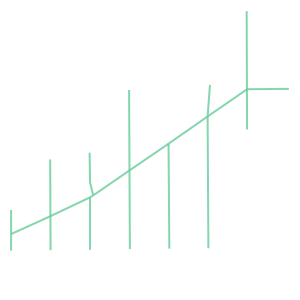

In [40]:
import shapely.wkt
shapely.wkt.loads(geom)

Displaying the output of a function can be helpful for troubleshooting - we can make sure the output looks correct. But often we want to use the output, instead of just looking at it.

In the cell below, rewrite the code above to assign the created geometry to a variable called `streets`. When we assign output to a variable, the notebook will not attempt to represent that output. Hint: recall how we use the assignment operator (`=`) to assign values to variables.

In [41]:
streets = shapely.wkt.loads(geom)

Shapely geometries have many different methods. One of them is called `buffer`. The `buffer` method takes one argument: a number that represents how far to buffer the geometry. The coordinates used to create the `streets` geometry were in meters, so the buffer value will represent meters as well. 

In the cell below, use the the `streets` geometry's `buffer` method to create the 20 meter buffer around the geometry and assign the output to a variable called `buffer20m`.

In [42]:
buffer20m = streets.buffer(20)

Even when we assign values to variables, we can still get the notebook to represent that value by putting the variable name on the last line of the cell. 

Run the cell below to get a represention of the `buffer20m` geometry.

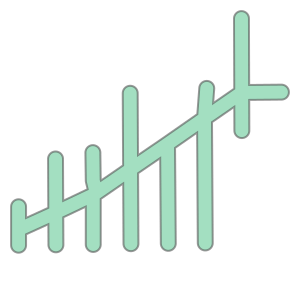

In [43]:
buffer20m

The `shapely.wkt` module contains another function called `dumps` that takes a geometry as an argument and returns the wkt representation of that geometry. In the cell below, do the following:

1. Generate the wkt representation of the `buffer20m` geometry using the `dumps` function.
1. Assign that wkt representation to a variable named `buffer20m_wkt`.
1. Display the wkt representation in the notebook.

In [44]:
buffer20m_wkt = shapely.wkt.dumps(buffer20m)
buffer20m_wkt

'POLYGON ((-20.0000000000000000 103.0000000000000000, -19.9036945334439359 104.9603428065912141, -19.6157056080646086 106.9018064403225736, -19.1388067146441756 108.8056935450892411, -18.4775906502257357 110.6536686473017994, -17.6384252869670988 112.4279347365199584, -16.6293922460509052 114.1114046603920400, -15.4602090672547394 115.6878656832729177, -14.1421356237309492 117.1421356237309510, -12.6878656832729071 118.4602090672547376, -11.1114046603920400 119.6293922460509123, -9.4279347365199548 120.6384252869671059, -7.6536686473017941 121.4775906502257357, -5.8056935450892428 122.1388067146441756, -3.9018064403225639 122.6157056080646157, -1.9603428065912130 122.9036945334439395, 0.0000000000000012 123.0000000000000000, 1.9603428065912154 122.9036945334439395, 3.9018064403225665 122.6157056080646157, 5.8056935450892464 122.1388067146441756, 7.6536686473017967 121.4775906502257357, 9.4279347365199566 120.6384252869671059, 11.1114046603920418 119.6293922460509123, 12.687865683272910

The [Shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html#object.buffer) for the `buffer` method includes several options for controlling the buffer. Refer to that documentation to complete the following step.

In the cell below, display a 50 meter buffer on the right side only of the `streets` geometry.

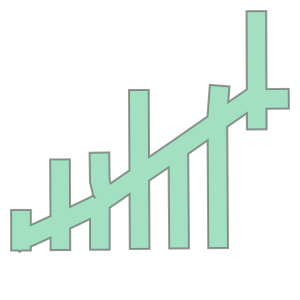

In [45]:
streets.buffer(-50, single_sided=True)

## Lesson 3: Represent data with the right structure

In order to deal with information in a way that both humans and computers can understand, we need a model for that information. The typical way to handle different varieties of information is to model them as different data types. You probably have experience with data types already. When you add a field to a table in GIS software, you need to specify the data type for that field. Maybe the field should hold integers, or text, or dates. You're probably also familiar with the pain that comes from having mismatched data types, like trying to deal with numeric values that are actually stored as text.

Python has data types too. The most basic types are pretty much the same as the ones we're used to. There are also some more complex types that we'll take a look at later. Just like with the data types in an attribute table, we can find ourselves in trouble if we use the wrong Python data type.

### 3.1: Differentiate between the primitive datatypes

There are four fundamental datatypes in Python, called primitives. We have already worked with each of these four types.

**Name**|**Label**|**Used for**
-|-|-
`int`|Integer|Integer numbers
`float`|Float|Any real number
`str`|String|Text characters
`bool`|Boolean|True / False



The `type` function takes a value as an argument, and returns the datatype of that value. Run the cell below to check the type of the `tobler` variable.

In [46]:
type(tobler)

str

Sometimes a value of one datatype can be represented as a different datatype. For example, the `int` value `7` might also plausibly be represented as the `float` value `7.0` or the `str` value `'7'`. In some cases, Python will be able to implicitly treat a value as if it was a different datatype. But most of the time, if we need a value to be represented as a different type, we must do it explicitly ourselves.

Run the three cells below to convert a value betwen different datatypes.

In [47]:
str(7)

'7'

In [48]:
int('7')

7

In [49]:
float(7)

7.0

Sometimes type conversion (also called casting) has unexpected effects, so be careful using it. Run the cell below to see what happens when converting the string value `'False'` to a Boolean.

In [50]:
bool('False')

True

Sometimes type coversion doesn't work at all, because there is no way to convert the value to the desired type. Run the cell below to see what happens when converting the string value in the `tobler` variable to a float.

In [51]:
float(tobler)

ValueError: could not convert string to float: 'Everything is related to everything else, but near things are more related than distant things.'

#### Checkpoint 3.1: Primitives

In the cell below, determine the data type of the `streets` variable.

In [52]:
type(streets)

shapely.geometry.multilinestring.MultiLineString

In the cell below, convert the `x1` value to an integer.

In [53]:
int(x1)

7

### 3.2: Interact with an object using its attributes

In Python, everything is an object. Values are objects. Functions are objects. Modules are objects. Being an object just means having a particular set of defined attributes. Attributes come in two varieties: properties and methods.

Properties are information about an object. For example, if a person was a Python object, they might have a `name` property because their name is a piece of information about them. 

Methods are things that an object can do. For example, a person obect might have a `breathe` method because breathing is a thing a person can do. We've already seen how a Shapely geometry object can use its `buffer` method to create a new geometry object representing a buffer around itself.

Shapely `Polygon` objects like `buffer20m` have an `exterior` property that returns the geometry of their boundary. Run the cell below to access this `exterior` property. 

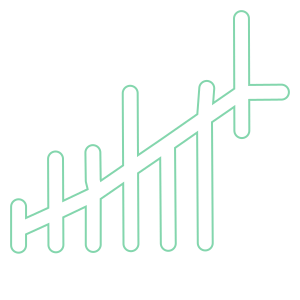

In [54]:
buffer20m.exterior

In order to access a particular attribute of an object, that attribute must be defined for that object. Run the cell below to see what happens when attempting to access the `exterior` property of a `MultiLineString` object like `streets`.

In [55]:
streets.exterior

AttributeError: 'MultiLineString' object has no attribute 'exterior'

When we encounter an error, the error message can be hard to read. Instead of starting at the top of the message, start at the bottom. `AttributeError: 'MultiLineString' object has no attribute 'exterior'` means that we tried to access the `exterior` attribute of a `MutliLineString` object. That's a problem because `MultiLineString` objects don't have an `exterior` attribute.

We can use the `help` function to find information about the attributes of an object. Note that many attributes start with one or more underscores. These attributes are generally used by Python behind the scenes and we would not use them directly. 

In [56]:
help(streets)

Help on MultiLineString in module shapely.geometry.multilinestring object:

class MultiLineString(shapely.geometry.base.BaseMultipartGeometry)
 |  MultiLineString(lines=None)
 |  
 |  A collection of one or more LineStrings.
 |  
 |  A MultiLineString has non-zero length and zero area.
 |  
 |  Parameters
 |  ----------
 |  lines : sequence
 |      A sequence LineStrings, or a sequence of line-like coordinate
 |      sequences or array-likes (see accepted input for LineString).
 |  
 |  Attributes
 |  ----------
 |  geoms : sequence
 |      A sequence of LineStrings
 |  
 |  Examples
 |  --------
 |  Construct a MultiLineString containing two LineStrings.
 |  
 |  >>> lines = MultiLineString([[[0, 0], [1, 2]], [[4, 4], [5, 6]]])
 |  
 |  Method resolution order:
 |      MultiLineString
 |      shapely.geometry.base.BaseMultipartGeometry
 |      shapely.geometry.base.BaseGeometry
 |      shapely.lib.Geometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  svg(self, scale

#### Checkpoint 3.2: Attributes

In the cells below, write code that allows you to access two different attributes of the `streets` object that were listed by the `help` function above. Hint: Remember that because methods are a type of function, you need to include parentheses after the method name to use the method.

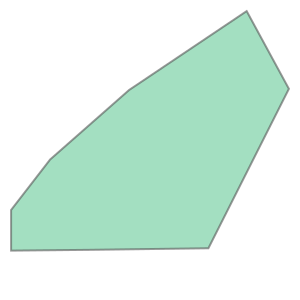

In [57]:
# convex_hull property
streets.convex_hull

In [58]:
# within method
streets.within(buffer20m)

True

### Application 3: Prepare data with Pandas

Consider an analysis in Ramsey county to determine if a voting precint's rate of absentee voting in 2022 is correlated with precint's partisan lean in 2020. The absentee ballot information is made available by the county in csv format. The election result data is made available by the state in Excel spreadsheet (xlsx) format. To perform this analysis, we will need to join the two datasets together.

For this scenario, we will use the Pandas module. Pandas is useful for working with tabular data, and comes with a large number of tools for transforming and cleaning datasets with Python. It is especially good in this case because it is capable of turning data from both csv and xlsx into the same type of object, called a dataframe. With both datasets modeled as the same type of Python object, it will be easier to join them together.

Run the cell below to import the Pandas module. Notice that the import statement is different than what we have used before. When we import a module, we have the option of providing an alias. Pandas is traditionally given the alias `pd`.

In [59]:
import pandas as pd

The data on absentee ballots are stored online in csv format at https://umn.maps.arcgis.com/sharing/rest/content/items/ff2833751fce47e3bc5d7048c6ddd705/data. The Pandas module has a `read_csv` function. This function takes a string representing the file's file path or URL as an argument. It then converts the data in that file to a dataframe object. 

Run the cell below to do the following:

* Using a string to represent the file path of the csv, assign that string to a varaible called `absentee_csv`. 
* Assign the output of the `read_csv` function in the pandas module to a variable called `absentee_df`

Because we imported the pandas module with an alias, as far as our Python code is concerned, this module is named `pd`. 

In [60]:
absentee_csv = 'https://umn.maps.arcgis.com/sharing/rest/content/items/ff2833751fce47e3bc5d7048c6ddd705/data'
absentee_df = pd.read_csv(absentee_csv)

Pandas dataframe objects like `absentee_df` have a `head` method. This method displays the first few rows of the dataframe, which is very useful for checking the schema of the data.

In the cell below, use the `head` method to display the first few rows of the `absentee_df` dataframe.

In [61]:
absentee_df.head()

,PCTCODE,Ballot sent,Registered voter count,Ballot ratio
0,1550,51,2051,0.024866
1,1340,20,1502,0.013316
2,345,22,2130,0.010329
3,1350,33,1455,0.022680
4,1210,43,2448,0.017565


The relevant value from this table is the Ballot ratio column, which indicates the rate of absentee ballots sent per registered voter in each precinct.

We also need data on the partisan lean of each precinct, as represented by the DFL share of the vote in the last presidential election. The data are stored in xlsx format at the URL https://umn.maps.arcgis.com/sharing/rest/content/items/6d7e8a2a7d454506b625abb61d4af303/data.

The Pandas module contains a `read_excel` function that operates very similarly to `read_csv`. One difference is that in addition to the file, the `read_excel` funtion takes a second argument specifying the worksheet in the file. In this case, use `0` for the second argument to indicate the first worksheet (counting in Python starts at `0`, not `1`)

In the cell below, do the following:
* Using a string to represent the full file path of the spreadsheet, assign that string to a varaible called `partisan_lean_xlsx`. 
* Assign the output of the `read_excel` function in the pandas module to a variable called `partisan_lean_df`
* Use the `head` method on the `partisan_lean_df` dataframe to display the first few rows of the table.

In [62]:
partisan_lean_xlsx = 'https://umn.maps.arcgis.com/sharing/rest/content/items/6d7e8a2a7d454506b625abb61d4af303/data'
partisan_lean_df = pd.read_excel(partisan_lean_xlsx, 0)
partisan_lean_df.head()

,COUNTYNAME,PCTCODE,USPRSDFL,USPRSTOTAL,DFLPERC
0,Ramsey,10,1593,2460,0.647561
1,Ramsey,20,726,1099,0.660601
2,Ramsey,30,1258,2004,0.627745
3,Ramsey,50,0,0,NaN
4,Ramsey,60,1100,1379,0.797679


In this dataset, the relevant value is from the DFLPERC column. This value represents the ratio of presidential votes that went to the Democratic Party nominee in the precint.

Now that each dataset is represented as a dataframe with a common field (PCTCODE), we can join them together. The Pandas module has a function called `merge` to join tables. The `merge` function takes four arguments:

1. The left dataframe in the join. In this case use `absentee_df`
1. The right dataframe in the join. In this case use `partisan_lean_df`
1. A string representing how the tables should be joined. In this case, we want only records that appear on both tables, so use the string `'inner'`.
1. A string representing the common field name between the two dataframes on which to base the join. In this case use the string `'PCTCODE'`

In the cell below, join the two dataframes, assign the ouput to a new dataframe called `election_data_df` and display the first few rows of the new dataframe.

In [63]:
election_data_df = pd.merge(partisan_lean_df, absentee_df, 'inner', 'PCTCODE')
election_data_df.head()

,COUNTYNAME,PCTCODE,USPRSDFL,USPRSTOTAL,DFLPERC,Ballot sent,Registered voter count,Ballot ratio
0,Ramsey,10,1593,2460,0.647561,83,2529,0.032819
1,Ramsey,20,726,1099,0.660601,21,1091,0.019248
2,Ramsey,30,1258,2004,0.627745,45,2081,0.021624
3,Ramsey,60,1100,1379,0.797679,74,1424,0.051966
4,Ramsey,70,1368,1684,0.812352,46,1740,0.026437


Dataframe objects like `election_data_df` have a `plot` method to create graphs of the data in the dataframe. The `plot` method takes three arguments that we care about for our analysis: 

* A string representing the name of the column to plot on the x-axis
* A string representing the name of the column to plot on the y-axis
* A string representing the name of the kind of plot to create. Refer to [this Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=kind#pandas.DataFrame.plot) to see the possible options.

In the cell below, create a scatter plot showing the relationship between the `'DFLPERC'` column (x-axis) and the `'Ballot ratio'` column (y-axis).

<Axes: xlabel='DFLPERC', ylabel='Ballot ratio'>

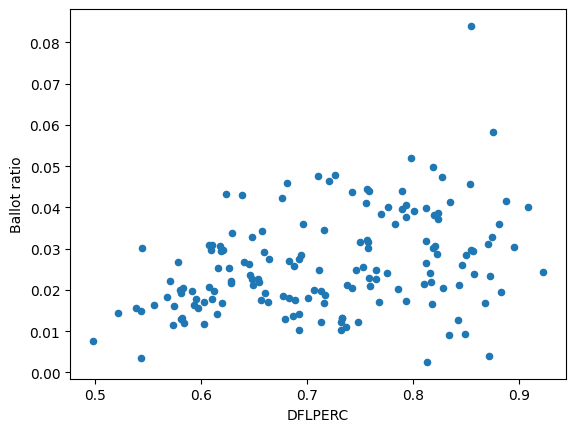

In [64]:
election_data_df.plot('DFLPERC', 'Ballot ratio', 'scatter')

## Lesson 4: Automate repetitive processes

A certain kind of laziness is required to be a good programmer. Only a true lazy person would work incredibly hard in order to get out of doing work. An industrious person, for example, would have been happy to sit over a light table all day cutting lines out of a scribe sheet for a map compliation. It took a lazy person to figure out how to get the computer to draw the map for them.

These kinds of lazy people hate doing the same thing over and over. It's boring. But since computers never get bored, repetitive processes are a good target to automate with Python. Probably the single biggest reason to learn Python is to get the computer to do the repetitive stuff so that we can focus on the fun stuff.

### 4.1: Represent multiple values using lists

Repetitive tasks usually don't involve doing literally the exact same thing every time. More typically, they involved running the same process on different inputs. For example, reprojecting 100 different feature classes from UTM to state plane. 

A key pattern for automating repetitive tasks is to represent multiple inputs as a single object, called a container. In Python, one common container is a list.

A list is an ordered collection of objects enclosed with brackets (`[]`). Each object in the list is separated by a comma. 

Run the cell below to assign a list of EPSG spatial reference codes to the variable `wkids`.

In [65]:
wkids = [4326, 3745, 6505, 3857]

Sometimes we want to access an individual element in a list, instead of the entire list. Bracket notation is the tool we use to do that.

Run the cell below to access the first element in the `wkids` list (remember that Python starts counting at `0`, not `1`).

In [66]:
wkids[0]

4326

#### Checkpoint 4.1: Lists

In the cell below, use a list to represent the names of any three Minnesota counties. Assign the list to a variable named `mn_counties`.

In [67]:
mn_counties = ['Ramsey', 'Hennepin', 'St. Louis']

In the cell below, access the third element of the `mn_counties` list.

In [68]:
mn_counties[2]

'St. Louis'

### 4.2: Execute code multiple times with iteration

With a list, we can use execute the same code code repeatedly for every element in that list using a `for` loop.

Run the code below to print out each EPSG code in the `wkid` list.

In [69]:
for id in wkids:
    print(id)

4326
3745
6505
3857


Here's what this code means:
* Take the first element in the `wkids` list, which is `4326`. 
* Assign that value to a new variable called `id`. 
* The colon (`:`) at the end of the line signals that the following indented code will be executed once for every element in the `wkids` list. In this case, we print out the value of `id`.
* After executing the code for the first element in the `wkid`, Python checks to see if there are any other values in the list. There are.
* The next value, `3745` gets assigned to `id`, and the indented code gets executed again. 
* This process iterates through the list until there are no more values left in `wkids`.

In this case every iteration executes only a single line of code, but there could be more. The entire block of indented code gets executed for every iteration of the loop.

#### Checkpoint 4.2: Iteration

The `streets` object we worked with earlier is a Shapely `MultiLineString` object, which means it is a single line geometry made up of multiple lines. `MultiLineString` objects have a `geoms` property that returns all these component lines as seperate objects in a list that we can iterate over using a for loop. Each of these component lines is a Shapely `LineString` object. 

In the cell below, use `print` to output each of these `LineString` obects.

In [70]:
for line in streets.geoms:
    print(line)

LINESTRING (598 307, 597 607)
LINESTRING (0 42, 99 87)
LINESTRING (0 0, 0 103)
LINESTRING (498 340, 598 409)
LINESTRING (200 135, 208 140)
LINESTRING (208 140, 301 204)
LINESTRING (301 204, 399 271)
LINESTRING (399 271, 498 340)
LINESTRING (208 140, 200 173, 199 248)
LINESTRING (598 409, 704 410)
LINESTRING (498 340, 504 420)
LINESTRING (100 1, 99 231)
LINESTRING (301 4, 299 407)
LINESTRING (500 6, 498 340)
LINESTRING (401 5, 399 271)
LINESTRING (99 87, 200 135)
LINESTRING (200 2, 200 135)


A Shapely `LineString` object has a `length` property that indicates how long it is.

In the cell below, print out the length of each street represented in `streets.geoms`.

In [71]:
for line in streets.geoms:
    print(line.length)

300.00166666203705
108.74741376235114
103.0
121.49485585818027
9.433981132056603
112.89375536317321
118.71394189394942
120.6731121667126
108.962520063096
106.00471687618433
80.22468448052632
230.0021739027699
403.00496274859944
334.0059879702758
266.00751869073173
111.8257573191436
133.0


### Application 4: Access metadata for feature layers with the ArcGIS API for Python

Consider a situation where we need to list the creation date for a number of layers published to ArcGIS Online. We could log into our portal and check the date of each item individually, but that would take too long. Instead, we can use the ArcGIS API for Python to get the information programatically.

Run the cell below to import the relevant part of the ArcGIS API for Python.

In [72]:
from arcgis.gis import GIS

This form of importing is different from others that we have used before. Like Shapely, the ArcGIS API for Python is made up of multiple modules, one of which is the `gis` module. Instead of making the entire `gis` module accessible to our script, however, we are just going to import one thing from it, called `GIS`. This part of the `gis` module allows us to make connections to our portal.

Run the cell below to use `GIS` to make a connection to arcgis.com and assign that connection to a variable called `gis`.

In [73]:
gis = GIS()

Our `gis` variable represents an anonymous connection. We could have connected as a specific user by passing a portal URL and credentials as arguments, but an anonymous connection is good enough for our purposes. 

One of the properties of the `gis` object is `content`. This property is the Content Manager for managing content in our portal. The `content` object has a method called `search` that finds content items in the portal that match the search criteria.

Run the cell below to create a list of Feature Layer items that have a `'Minnesota'` tag and store that list in a variable called `items`. 

In [74]:
items = gis.content.search('tags: Minnesota', 'Feature Layer')

When working in a notebook, we have access to the `display` function. The `display` function is similar to `print`, but it can show more than just text. The `display` function takes one argument, which is an object to display, then displays that object in the notebook cell's output.

In the cell below, use the `display` function to display one of the elements in the `items` container. Hint: you will need bracket notation to access an individual element in the list.

In [75]:
display(items[0])

<Item title:"FWS National 2019-2020 Hunt Units" type:Feature Layer Collection owner:richard_easterbrook@fws.gov_fws>

Accessing individual items one at a time is hardly any better than just going to the portal web page. In the cell below, use a loop to display every element in `items`.

In [76]:
for item in items:
    display(item)

<Item title:"FWS National 2019-2020 Hunt Units" type:Feature Layer Collection owner:richard_easterbrook@fws.gov_fws>

<Item title:"Bedrock Geology - County Datasets" type:Feature Layer Collection owner:stub0035_UMN>

<Item title:"CurrentSurvey5/12" type:Feature Layer Collection owner:helge312_UMN>

<Item title:"best elementary schools mn" type:Feature Layer Collection owner:LEPROW24>

<Item title:"MN County Boundaries" type:Feature Layer Collection owner:looby014_UMN>

<Item title:"MN_House_Map_WFL1" type:Feature Layer Collection owner:hannah.zimmerman_cls_ncsl>

<Item title:"District 2" type:Feature Layer Collection owner:schue417_UMN>

<Item title:"Murray County Transmission Lines _ 1 Mile Buffer" type:Feature Layer Collection owner:masso035_UMN>

<Item title:"Minnesota Historical Society Sites" type:Feature Layer Collection owner:scrosson_UMN>

<Item title:"MN School District Boundaries  JSH2" type:Feature Layer Collection owner:jhanson4@isd271.org>

The `display` function provides a nice representation of the item, and a link to its item details page, but we just want to know when each item was created. Each of the objects in the `items` list has a `created` property that stores this information.

In the cell below, `print` the value of the `created` property for each element in `items`.

In [77]:
for item in items:
    print(item.created)

1569425637000
1531927171000
1488668514000
1556502392000
1649097085000
1535660692000
1661796221000
1624405192000
1539207249000
1524168110000


The `created` property stores the item's creation time in miliseconds since January 1, 1970. This is a good way for computers to keep track of time, but it's not very helpful for people. 

Earlier, we used the `ctime` function from the `time` module to return a human-readable timestamp. When used without an argument, `ctime` returns the current time. But if you provide the time in seconds since January 1, 1970 as an argument, `ctime` will return the corresponding timestamp.

In the cell below, print out a human-readable timestamp for the creation date of each of the elements in `items`. Hint: You will need to convert the miliseconds returned by the `created` property into the seconds expected by the `ctime` function. You will probably want to use a variable to store that time in seconds.

In [78]:
for item in items:
    seconds = item.created/1000
    human_time = time.ctime(seconds)
    print(human_time)

Wed Sep 25 10:33:57 2019
Wed Jul 18 10:19:31 2018
Sat Mar  4 17:01:54 2017
Sun Apr 28 20:46:32 2019
Mon Apr  4 13:31:25 2022
Thu Aug 30 15:24:52 2018
Mon Aug 29 13:03:41 2022
Tue Jun 22 18:39:52 2021
Wed Oct 10 16:34:09 2018
Thu Apr 19 15:01:50 2018


## Summary

Here are the top 6 takeaways from this workshop:

* Python can be used as a calculator. This is a good way to start.
* Use variables with meaningful names.
* Worry about using abstractions, not the low-level details of how they work.
* There is a good chance a module already exists to solve your problem. 
* Datatypes matter.
* Doing the same thing over and over is boring. Use iteration to get Python to do it for you.

These are the geospatial modules we used:

Module|Good for working with|Documentation
-|-|-
`shapely`|feature geometry|https://shapely.readthedocs.io/en/stable/manual.html
`pandas`|tabular data|https://pandas.pydata.org/docs/
`arcgis`|items in an ArcGIS portal|https://developers.arcgis.com/python/

## On your own

To maintain and improve on what you've learned, continue practicing with Python after this workshop. You will receive a copy of all the course materials so you can keep practicing with the code in this notebook.

To advance you knowledge beyond the concepts in this workshop, look into the following:

* Container types other than list: tuple, set, and dictionary
* Conditional statements: `if`, `else`, and `elif`
* Other useful modules for geospatial work: `arcpy`, `numpy`, `rasterio`, `fiona`
* Reading and writing files with Python

You may also want to consider these resources for additional practice

* [30 Days of Python](https://blog.teclado.com/30-days-of-python/)
* [Tutorials from Real Python](https://realpython.com/)
* [Intro to Python tutorial from DataCamp](https://www.learnpython.org/)
* [Python Tutorial from the Python Foundation](https://docs.python.org/3.7/tutorial/)
* [Esri Python tutorials](https://www.esri.com/training/Bookmark/FKCJSFXXD)

The best way to hone your Python skills, however, is to incorporate them into your regular workflows. Find simple tasks that can be automated with Python, and build from there.

Map on!